<a href="https://colab.research.google.com/github/kalijauhari/research/blob/main/Combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
import time
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import VotingClassifier
d=pd.read_csv("train.csv")
d.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [2]:
d.shape 

(7352, 563)

In [3]:
d.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
d.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [6]:
d.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [7]:
d['activity_code']= d.Activity.astype('category').cat.codes

In [8]:
d.activity_code

0       2
1       2
2       2
3       2
4       2
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: activity_code, Length: 7352, dtype: int8

In [9]:
d1=d.drop('Activity',axis=1)
d1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity_code
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,5
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,5
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,5
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,5


In [10]:
xcol=d1.columns.to_list()
xcol.pop(-1)
xdata=d1[xcol]
ycol='activity_code'

In [11]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test =train_test_split(d1[xcol],d1[ycol].values,test_size =0.1)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((6616, 562), (736, 562), (6616,), (736,))

In [13]:
y_test 

array([2, 0, 3, 1, 3, 5, 2, 2, 1, 3, 1, 1, 2, 0, 1, 5, 5, 1, 1, 4, 5, 4,
       1, 1, 0, 5, 0, 5, 4, 3, 4, 5, 1, 3, 2, 0, 3, 0, 0, 0, 3, 0, 0, 5,
       4, 4, 2, 2, 1, 0, 5, 1, 0, 4, 0, 0, 3, 3, 3, 0, 3, 2, 0, 2, 1, 4,
       5, 0, 1, 0, 2, 3, 0, 5, 3, 5, 2, 0, 3, 1, 2, 2, 2, 4, 3, 3, 4, 3,
       2, 1, 5, 2, 0, 3, 3, 3, 2, 1, 0, 0, 1, 3, 2, 2, 2, 2, 3, 0, 4, 0,
       2, 3, 3, 0, 0, 0, 1, 5, 0, 5, 2, 3, 4, 5, 1, 2, 0, 1, 1, 2, 2, 0,
       0, 0, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 1, 1, 0, 1, 4, 4, 0, 3, 2, 3,
       3, 4, 1, 1, 3, 1, 5, 5, 4, 0, 2, 2, 3, 2, 5, 1, 2, 0, 1, 0, 0, 0,
       5, 4, 2, 2, 0, 4, 5, 4, 2, 5, 3, 5, 2, 4, 5, 3, 2, 1, 0, 2, 3, 1,
       0, 3, 1, 0, 0, 1, 1, 2, 2, 1, 1, 5, 0, 1, 0, 4, 3, 0, 0, 5, 1, 3,
       0, 1, 1, 0, 3, 3, 3, 3, 2, 4, 3, 4, 1, 3, 4, 5, 3, 0, 2, 3, 2, 3,
       3, 0, 1, 4, 2, 5, 0, 1, 3, 0, 2, 5, 3, 5, 1, 3, 3, 0, 0, 2, 5, 1,
       2, 0, 0, 1, 5, 4, 2, 2, 2, 2, 0, 2, 5, 2, 0, 3, 0, 2, 3, 2, 0, 4,
       4, 0, 3, 2, 3, 1, 5, 2, 2, 1, 1, 5, 0, 2, 3,

In [14]:
#Build Random Forest model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
y_train_pred=rf.predict(x_train)#predicting train data
y_test_pred=rf.predict(x_test)

In [15]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred))#Accuracy of train data is 100%
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred))

Training Accuracy  1.0
Testing Accuracy  0.9809782608695652


In [16]:
#Build Decision Tree model 
tdt = DecisionTreeClassifier().fit(x_train,y_train)
y_train_pred=tdt.predict(x_train)#predicting train data
y_test_pred=tdt.predict(x_test)

In [17]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred))#Accuracy of train data is 100%
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred))

Training Accuracy  1.0
Testing Accuracy  0.9538043478260869


In [18]:
#Build LogisticRegression model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

for i in np.arange(0.1, 1.1 , 0.1):
    for y in ["l1", 'l2']:
        logisticRegr = LogisticRegression(random_state = 5, max_iter=1000, C=i, penalty = y, solver = 'liblinear')
logisticRegr.fit(x_train, y_train)
y_train_pred=logisticRegr.predict(x_train)
y_test_pred = logisticRegr.predict(x_test)

In [19]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred))#Accuracy of train data is 100%
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred))

Training Accuracy  0.9924425634824667
Testing Accuracy  0.9809782608695652


In [20]:
#Build KNeighbors model 
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
y_train_pred=knn.predict(x_train)#predicting train data
y_test_pred=knn.predict(x_test)

In [21]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred))#Accuracy of train data is 100%
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred))

Training Accuracy  0.9785368802902056
Testing Accuracy  0.9741847826086957


In [22]:
#Build SVM model 
sv=SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True) #default kernel is 'rbf'
sv.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)#predicting train data
y_test_pred=knn.predict(x_test)

In [23]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred))#Accuracy of train data is 100%
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred))

Training Accuracy  0.9785368802902056
Testing Accuracy  0.9741847826086957


In [24]:
classifiers = [
    RandomForestClassifier(),
    DecisionTreeClassifier(),  
    LogisticRegression(max_iter=10000),    
    KNeighborsClassifier(),
    SVC(kernel="rbf")  
]

In [25]:
def f_score(X_train, X_test, y_train, y_test):
    for clf in classifiers:
        s = time.time()
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        f = f1_score(y_true=y_test,y_pred=y_pred,average="macro")
        e = time.time()
        print(f"Score: {round(f,3)} \t Time(in secs): {round(e-s,3)} \t Classifier: {clf.__class__.__name__}")

In [26]:
f_score(x_train, x_test, y_train, y_test)

Score: 0.984 	 Time(in secs): 13.039 	 Classifier: RandomForestClassifier
Score: 0.948 	 Time(in secs): 4.78 	 Classifier: DecisionTreeClassifier
Score: 0.981 	 Time(in secs): 68.308 	 Classifier: LogisticRegression
Score: 0.979 	 Time(in secs): 0.343 	 Classifier: KNeighborsClassifier
Score: 0.95 	 Time(in secs): 5.394 	 Classifier: SVC


In [27]:
pred = rf.predict(x_test)

In [28]:
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9809782608695652
Recall:  0.9809782608695652


In [29]:
pred = tdt.predict(x_test)

In [30]:
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9538043478260869
Recall:  0.9538043478260869


In [31]:
pred = logisticRegr.predict(x_test)

In [32]:
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9809782608695652
Recall:  0.9809782608695652


In [33]:
pred = knn.predict(x_test)

In [34]:
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9741847826086957
Recall:  0.9741847826086957


In [35]:
pred = sv.predict(x_test)

In [36]:
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9809782608695652
Recall:  0.9809782608695652


In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,max_features=1,random_state=42)
classifier.fit(x_train, y_train);

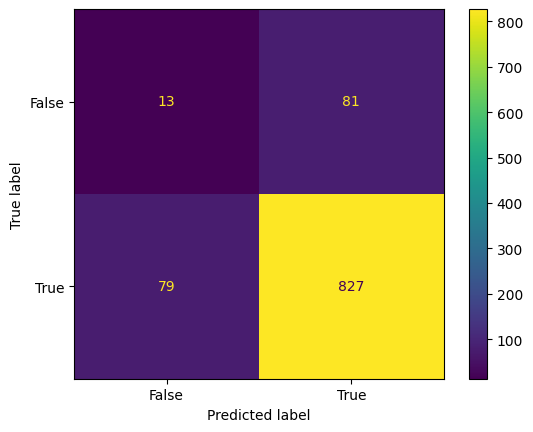

In [38]:
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

predictions = classifier.predict(x_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

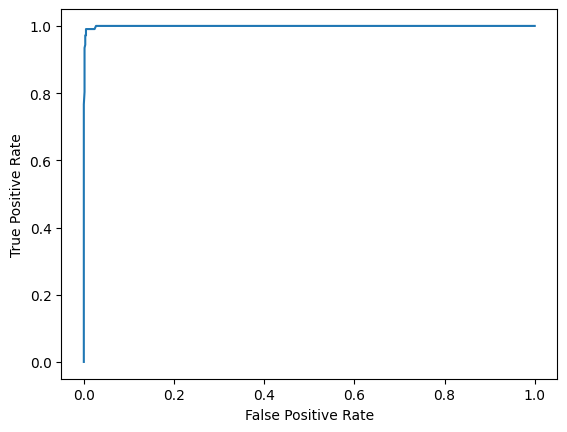

In [39]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_features=1,random_state=42)
classifier.fit(x_train, y_train);

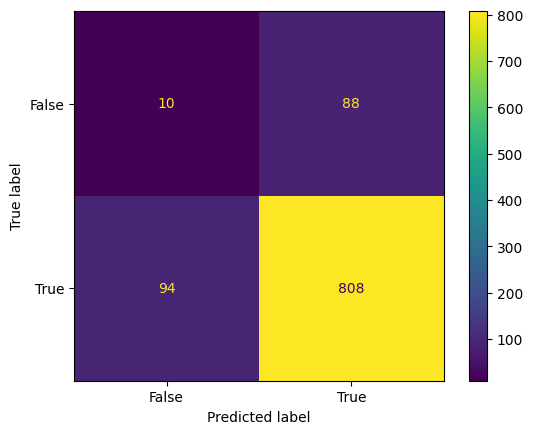

In [41]:
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

predictions = classifier.predict(x_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

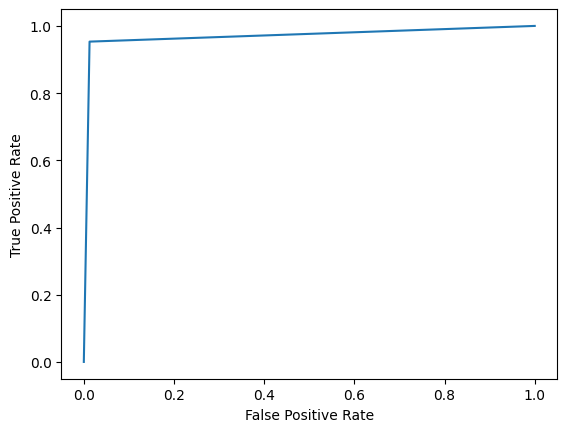

In [42]:
y_pred_proba = tdt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(x_train, y_train);

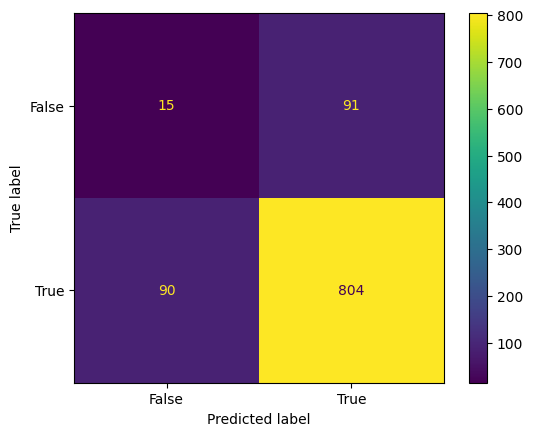

In [44]:
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

predictions = classifier.predict(x_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

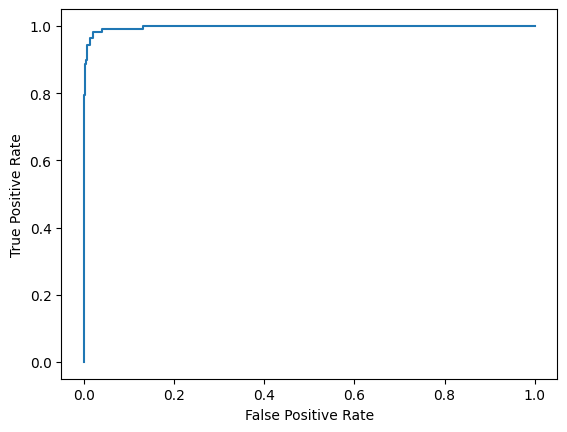

In [45]:
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train);

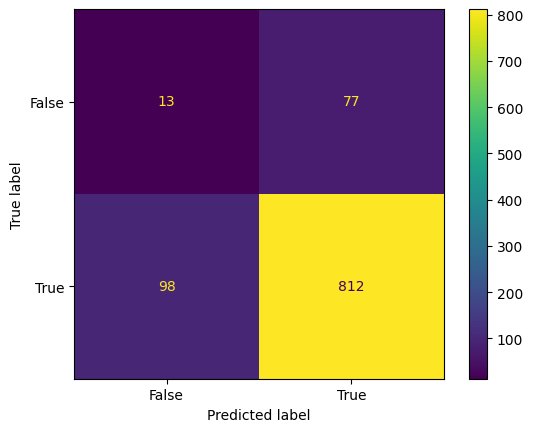

In [47]:
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

predictions = classifier.predict(x_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

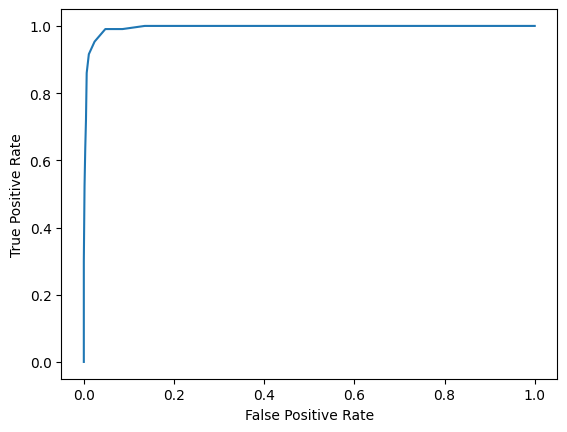

In [48]:
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')
classifier.fit(x_train,y_train)

SVC()

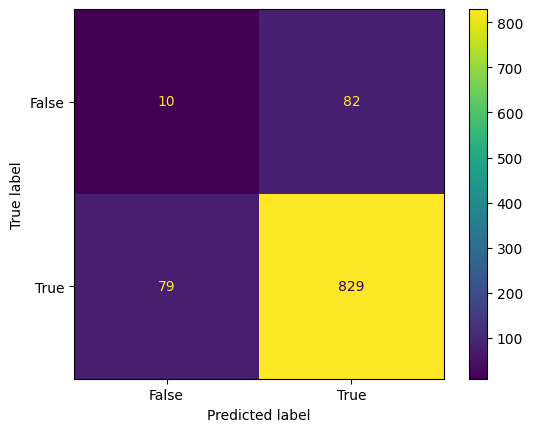

In [50]:
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

predictions = classifier.predict(x_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

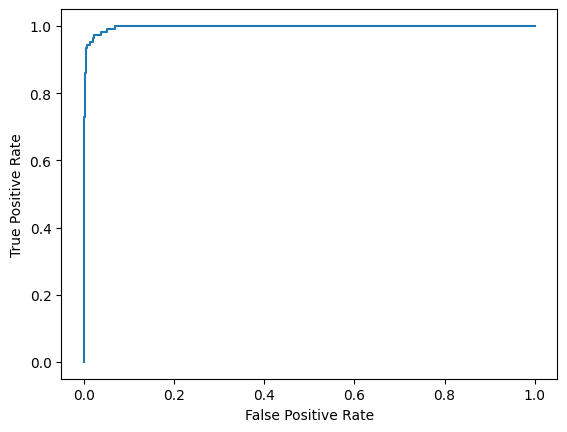

In [51]:
y_pred_proba = sv.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
##Esemble Learning
final_model = VotingClassifier(
    estimators=[('rf', rf), ('dtc', tdt), ('lf', logisticRegr),('knn',knn),('SVC',sv)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(x_test)
pred_final_train = final_model.predict(x_train) 

print("Training Accuracy ",accuracy_score(y_train, pred_final_train))
print("Testing Accuracy ",accuracy_score(y_test, pred_final))
print("Precision ",precision_score(y_test, pred_final,average='micro'))
print("Recall ",recall_score(y_test, pred_final,average='micro'))
print("f1 score ",f1_score(y_test,pred_final,average='micro'))

Training Accuracy  0.9987908101571947
Testing Accuracy  0.9877717391304348
Precision  0.9877717391304348
Recall  0.9877717391304348
f1 score  0.9877717391304348


In [53]:
final_model = VotingClassifier(
    estimators=[('rf', rf), ('dtc', tdt), ('lf', logisticRegr),('knn',knn),('SVC',sv)], voting='hard')
final_model.fit(x_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('dtc', DecisionTreeClassifier()),
                             ('lf',
                              LogisticRegression(max_iter=1000, random_state=5,
                                                 solver='liblinear')),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('SVC',
                              SVC(C=1000000000.0, gamma=1e-07,
                                  probability=True))])

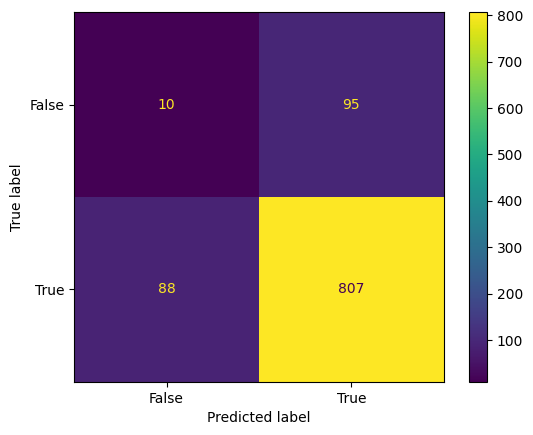

In [54]:
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

predictions = final_model.predict(x_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

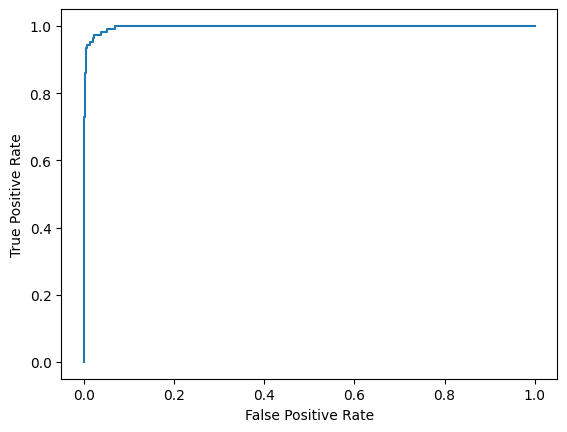

In [55]:
y_pred_proba = sv.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()